<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Исследование-качества-модели-без-преобразования" data-toc-modified-id="Исследование-качества-модели-без-преобразования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование качества модели без преобразования</a></span></li><li><span><a href="#Исследования-качества-модели-после-преобразования" data-toc-modified-id="Исследования-качества-модели-после-преобразования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследования качества модели после преобразования</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Нужно разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Данные нужно защитить таким образом, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Выведем датафрейм с помощью try except и изучим признаки:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('insurance.csv')


display(df)
display(df.describe())
df.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
# Создадим функцию, которая выведет количество пропущенных значений, дубликатов и унакльных значений таблиц
def information(data):
    for i in data.columns:
        print(f' \nУникальные значения: {i}\n', data[i].unique())
    print(f'\nКоличество пропущенных значений:\n', data.isna().sum())
    print('\nКоличество дубликатов в датафрейме:', data.duplicated().sum())

In [5]:
# Выведем с помощью функции информацию 
information(df)

 
Уникальные значения: Пол
 [1 0]
 
Уникальные значения: Возраст
 [41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
 
Уникальные значения: Зарплата
 [49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 38500. 51800.
 33

**Вывод:** В датафрейме отсуствуют пропуски и есть дубликаты. Также таблицы по зарплате и возраста, имеют дробные знаение, хотя после точки отстутсвуют какие-либо значения. Приведем эти таблицы к целочисленным значениям.

In [6]:
# Приведем таблицы зарплата и возраст к целочисленным значениям
df[['Возраст', 'Зарплата']] = df[['Возраст', 'Зарплата']].astype(int)
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
...,...,...,...,...,...
4995,0,28,35700,2,0
4996,0,34,52400,1,0
4997,0,20,33900,2,0
4998,1,22,32700,3,0


**Вывод:** анализ данных произведен, дальнейшей предобработки не требуется.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$


**Вопсрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Нет, качество линейной регресии не изменится 

**Обоснование:** 

Допустим, что:

$$a = a'$$

тогда:

$$X_p = XPw'$$

Если $w$:  

$$w = (X^T X)^{-1} X^T y$$

То при умножении на обратную матрицу $w'$:

$$w' = ((XP)^T XP)^{-1} (XP)^T y$$

Произведем сокращения:

$$a' = XP((XP)^T XP)^{-1} (XP)^T y = XP(X^T P^T XP)^{-1} P^T X^T y =  XPP^{-1}(X^T X)^{-1}  (P^T)^{-1}  P^T X^T y
= XE(X^T X)^{-1}EX^T y = X(X^T X)^{-1}X^T y$$

Итоговая формула:

$$a' =  X(X^T X)^{-1}X^T y = Xw$$

Таким образом: 
$$a = a'$$
$$Xw = XPw'$$


**Вывод:** качество предсказания линейной регрессии не изменится

## Алгоритм преобразования

**Алгоритм**
* Создадим матрицу признаков данных (X) и вектор целевого признака (y)
* Проверим данные на качестве модели без преобразований 
* Создадим случайную матрицу (P) и проверим её на обратимость
* Создадим новую матрицу PX 
* Приоизведем расчет метрики качества на исходных, и преобразованных данных

**Обоснование:**
В результате умножения матриц, доказанно, что качество предсказания линейной регрессии не измениться. Если произвести умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом этого предсказания станет произведение изменённой таблицы с признаками на вектор, который выводится из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. Произведем проверку алгоритма

## Проверка алгоритма

### Исследование качества модели без преобразования

In [7]:
# Поделим исходные данные на целевые и матричные признаки
features_X = df.drop(['Страховые выплаты'], axis=1)
target_y = df['Страховые выплаты']

In [8]:
# Разделим исходные данные на тестовую и обучающую выборки
features_train, features_test, target_train, target_test = train_test_split(features_X, 
                                                                           target_y, 
                                                                           test_size=.25, 
                                                                           random_state=2014)
# Выведем размеры исходных данных
print(target_train.shape)
print(target_test.shape)
print(features_train.shape)
print(features_test.shape)

(3750,)
(1250,)
(3750, 4)
(1250, 4)


In [9]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Качество модели без преобразования:', r2_score(target_test, predictions))

Качество модели без преобразования: 0.42137193104830206


### Исследования качества модели после преобразования 

In [10]:
# Создадим случайную матрицу P, зададим границы от 0 до 5 
#P = np.random.normal(0, 5, size=(features_X.shape[1], features_X.shape[1]))
#P

In [11]:
# Проверим матрицу P на обратимость
#np.linalg.inv(P)

In [77]:
# Функуция, для создания случайной матрицы и проверки её на обратимсоть
def random_matrix(data):
        transform_matrix = np.random.normal(0, 5, size=(data.shape[1], data.shape[1]))
        try:
            P = np.linalg.inv(transform_matrix)
            return P
        except:
            'Error'

In [78]:
# применим функцию
random_matrix(features_X)

array([[-0.75929423,  0.18001817,  0.0450978 , -0.77028921],
       [-0.10791501, -0.03451579,  0.01893103,  0.04427013],
       [-0.13192672, -0.01601698, -0.15101697, -0.27706454],
       [-0.66421993,  0.13949758,  0.1608221 , -0.71056187]])

In [79]:
# Сохраним полученное значений с функции
P = random_matrix(features_X)

In [81]:
# Умножим случайную матрицу на тренировочную выборку 
PX_train = features_train @ P

# Передадим полученным данным столбцы features_train
PX_train.columns = features_train.columns
PX_train

,Пол,Возраст,Зарплата,Члены семьи
1318,-6023.733495,-764.913592,1673.429673,6427.462763
2439,-4803.791404,-611.393448,1333.238994,5125.128897
2945,-5232.896370,-664.136827,1453.830405,5583.991108
1009,-7290.319668,-925.147113,2025.675934,7779.039300
3871,-7857.357203,-997.592392,2182.939355,8384.120011
...,...,...,...,...
2681,-5607.048432,-712.309955,1557.493984,5982.349726
953,-5784.330779,-733.838259,1607.386275,6172.034068
1795,-6247.045619,-793.067395,1735.640645,6665.796609
84,-6232.326982,-791.226590,1731.571113,6649.871291


In [82]:
# Применим тоже самое к тестовой выборке
PX_test = features_test @ P

# Передадим полученным данным столбцы features_test
PX_test.columns = features_test.columns
PX_test

,Пол,Возраст,Зарплата,Члены семьи
1200,-3044.267601,-388.142027,844.356045,3247.969077
4743,-2998.067665,-381.313990,832.185064,3198.989217
3372,-3432.106660,-437.480311,952.030867,3661.744194
4587,-5145.974703,-654.401660,1428.676249,5490.375877
4925,-4773.984920,-607.617407,1324.950693,5093.323706
...,...,...,...,...
3635,-4296.272646,-546.663669,1192.662611,4583.536575
2359,-4786.404824,-607.757150,1329.606415,5107.072881
398,-5621.767070,-714.150760,1561.563516,5998.275045
4996,-7813.016687,-992.022762,2170.656139,8336.366778


In [83]:
# Вносим значение 1 в нулевой столбец 
X = np.concatenate((np.ones((PX_train.shape[0], 1)), PX_train), axis=1)

# Создадим датафрейм из полученной матрицы
pd.DataFrame(X)

,0,1,2,3,4
0,1.0,-6023.733495,-764.913592,1673.429673,6427.462763
1,1.0,-4803.791404,-611.393448,1333.238994,5125.128897
2,1.0,-5232.896370,-664.136827,1453.830405,5583.991108
3,1.0,-7290.319668,-925.147113,2025.675934,7779.039300
4,1.0,-7857.357203,-997.592392,2182.939355,8384.120011
...,...,...,...,...,...
3745,1.0,-5607.048432,-712.309955,1557.493984,5982.349726
3746,1.0,-5784.330779,-733.838259,1607.386275,6172.034068
3747,1.0,-6247.045619,-793.067395,1735.640645,6665.796609
3748,1.0,-6232.326982,-791.226590,1731.571113,6649.871291


Присвоим переменной y целевой признак и вычислим вектор $w$ по формуле:
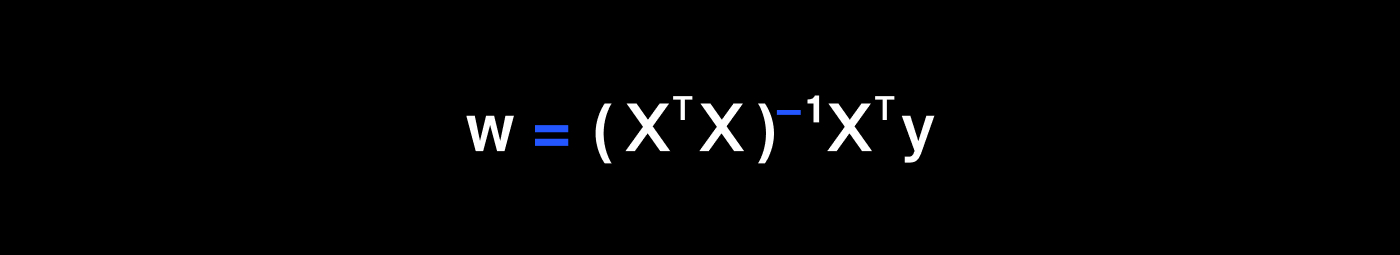

In [84]:
y = target_train
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

In [85]:
# Вычислим предсказание модели методом умножения тестовой выборки и увеличим на величину сдвига значение 𝑤0
prediction_change = PX_test.dot(w[1:]) + w[0]

# Выведем полученный результат
print('Качество модели после преобразования:', r2_score(target_test, prediction_change))

Качество модели после преобразования: 0.42137193808447815


**Вывод:** В результате проведенного исследования удалось доказать, что показатели предсказаний модели, обученной на исходных признаках и модели, обученной на признаках, полученных после умножения на обратимую матрицу практически одинаковы. Разница составляет молую долю после запятой. Таким образом алгоритм защиты персональных данных путём умножения признаков на обратимую матрицу можно использовать в работе.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [X]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке исполнения
- [X]  Выполнен шаг 1: данные загружены
- [X]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [X]  Указан правильный вариант ответа
    - [X]  Вариант обоснован
- [X]  Выполнен шаг 3: предложен алгоритм преобразования
    - [X]  Алгоритм описан
    - [X]  Алгоритм обоснован
- [X]  Выполнен шаг 4: алгоритм проверен
    - [X]  Алгоритм реализован
    - [X]  Проведено сравнение качества моделей до и после преобразования